In [1]:
# Reorder months properly
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

In [2]:
import pandas as pd
file_path= r"E:\Jupyter\data\revenue_data.csv"

revenue_data_csv=pd.read_csv(file_path)
# Convert the Date column to datetime format if it isn't already
revenue_data_csv['Date'] = pd.to_datetime(revenue_data_csv['Date'])
revenue_data_csv.set_index('Date',inplace=True)
revenue_data_csv.dropna(inplace=True)

In [3]:
revenue_data_csv.head()

,Revenue
Date,
2021-01-31,91.11
2021-02-28,106.83
2021-03-31,128.37
2021-04-30,134.56
2021-05-31,109.62


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
#from rich import print

# Extract the revenue series
revenue_series = revenue_data_csv['Revenue']

# Check for missing values
if revenue_series.isna().any():
    print(f"Warning: {revenue_series.isna().sum()} missing values found. Interpolating...")
    revenue_series = revenue_series.interpolate()

# Determine the frequency of the data
# For monthly data, period=12
period = 12
# Perform the decomposition of revenue (Deseasonalized revenue)
decomposition = seasonal_decompose(revenue_series, model='multiplicative', period=period)

Performing multiplicative seasonal decomposition...
Using period = 12 for seasonal decomposition


In [ ]:
# Plot the decomposition
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(revenue_series, label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Apply 3-month moving average to the trend component
print("Applying 3-month moving average...")
trend_ma = decomposition.trend.rolling(window=3, center=True).mean()

# Reseasonalize the data (trend with moving average * seasonal component)
reseasonalized = trend_ma * decomposition.seasonal

# Handle NaN values that may appear at the beginning and end due to the moving average
reseasonalized = reseasonalized.dropna()

# Plot the original data vs reseasonalized data

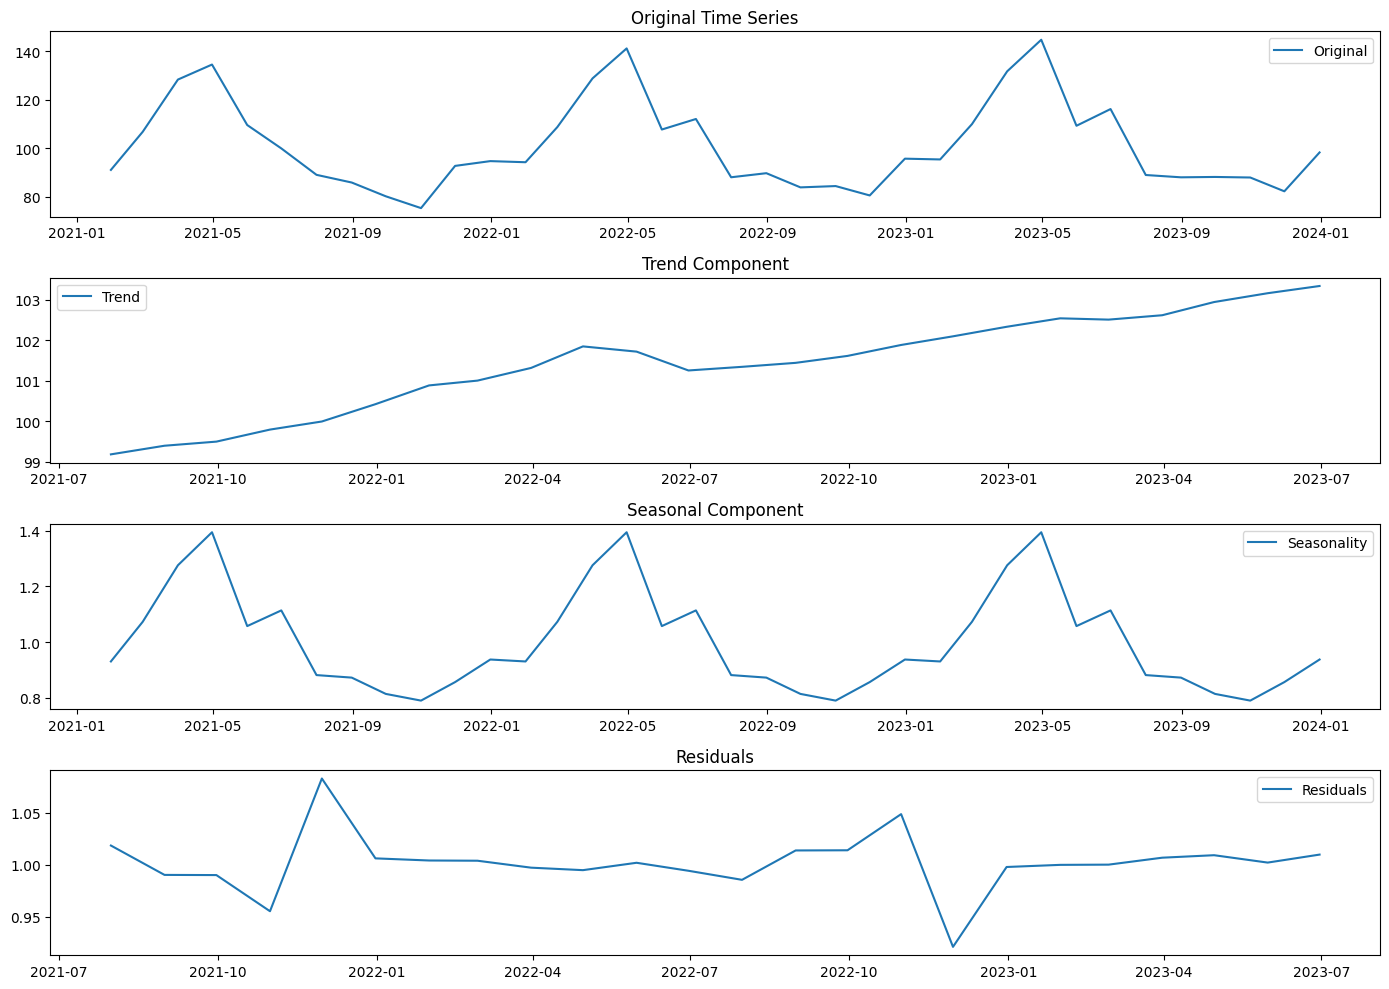

Applying 3-month moving average...


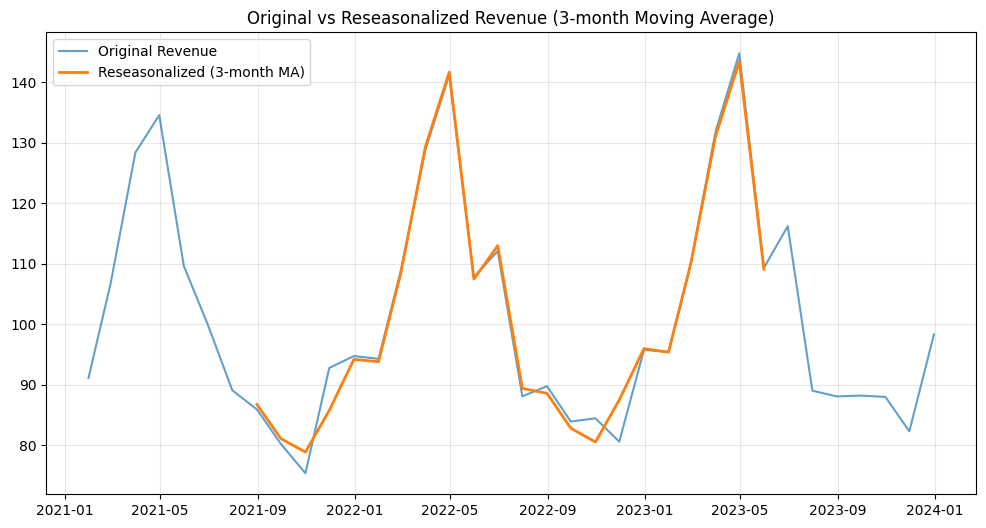


Comparison Statistics:
         Original  Reseasonalized
count   22.000000       22.000000
mean   101.629545      101.549072
std     20.037923       19.806082
min     75.360000       78.868012
25%     86.452500       86.927474
50%     95.085000       94.784765
75%    109.822500      109.808716
max    144.790000      143.447753

Average absolute percentage difference: 1.67%
Results saved to 'reseasonalized_revenue.csv'


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(revenue_series, label='Original Revenue', alpha=0.7)
plt.plot(reseasonalized, label='Reseasonalized (3-month MA)', linewidth=2)
plt.title('Original vs Reseasonalized Revenue (3-month Moving Average)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate and display statistics to compare original and reseasonalized data
comparison_df = pd.DataFrame({
    'Original': revenue_series,
    'Reseasonalized': reseasonalized
}).dropna()

print("\nComparison Statistics:")
print(comparison_df.describe())

# Calculate percentage difference between original and reseasonalized
comparison_df['Percent_Diff'] = ((comparison_df['Reseasonalized'] - comparison_df['Original']) / 
                                comparison_df['Original'] * 100)

print("\nAverage absolute percentage difference: {:.2f}%".format(
    comparison_df['Percent_Diff'].abs().mean()))

# Export the results to CSV if needed
comparison_df.to_csv('reseasonalized_revenue.csv')
print("Results saved to 'reseasonalized_revenue.csv'")

In [7]:
reseasonalized

Date
2021-08-31     86.737264
2021-09-30     81.100013
2021-10-31     78.868012
2021-11-30     85.752548
2021-12-31     94.188952
2022-01-31     93.804398
2022-02-28    108.447626
2022-03-31    129.335288
2022-04-30    141.661969
2022-05-31    107.464434
2022-06-30    112.985982
2022-07-31     89.390923
2022-08-31     88.580032
2022-09-30     82.799909
2022-10-31     80.532748
2022-11-30     87.498104
2022-12-31     95.963821
2023-01-31     95.380578
2023-02-28    110.046137
2023-03-31    130.996631
2023-04-30    143.447753
2023-05-31    109.096451
dtype: float64

# Calculate deseasonalized data

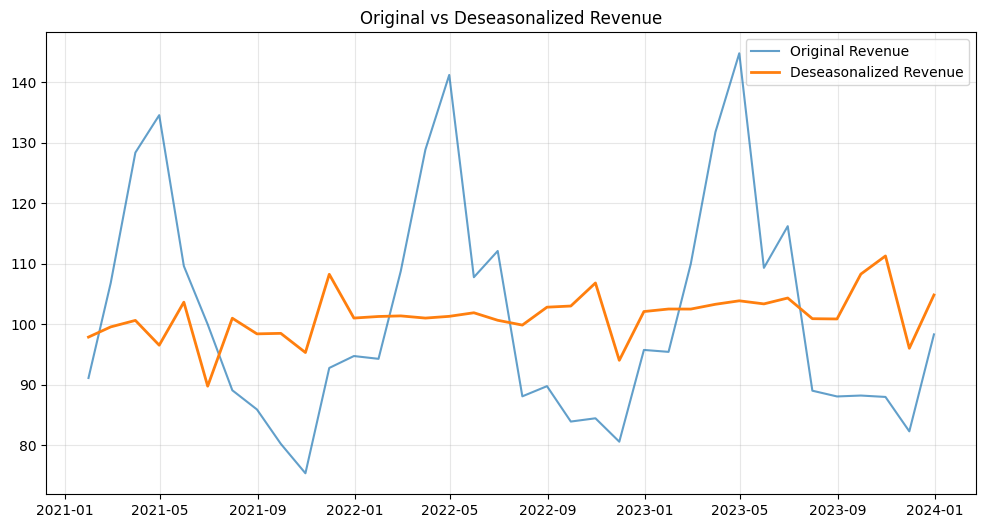

Comparison of Original and Deseasonalized Revenue:
            Original  Deseasonalized  Seasonal_Factor
Date                                                 
2021-01-31     91.11       97.873906         0.930892
2021-02-28    106.83       99.559547         1.073026
2021-03-31    128.37      100.631902         1.275639
2021-04-30    134.56       96.532587         1.393933
2021-05-31    109.62      103.644593         1.057653
2021-06-30     99.98       89.761495         1.113841
2021-07-31     89.08      100.993190         0.882040
2021-08-31     85.91       98.407255         0.873005
2021-09-30     80.23       98.490992         0.814592
2021-10-31     75.36       95.321528         0.790587
2021-11-30     92.77      108.256248         0.856948
2021-12-31     94.74      101.018958         0.937844


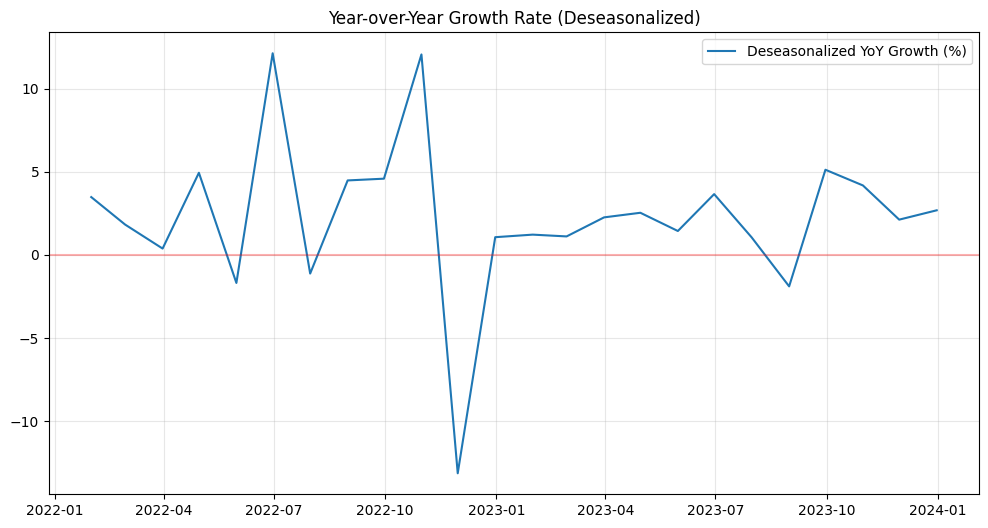


Deseasonalized Revenue Statistics:
count     36.000000
mean     101.354075
std        4.089182
min       89.761495
25%       99.784477
50%      101.291252
75%      103.313161
max      111.284342
dtype: float64


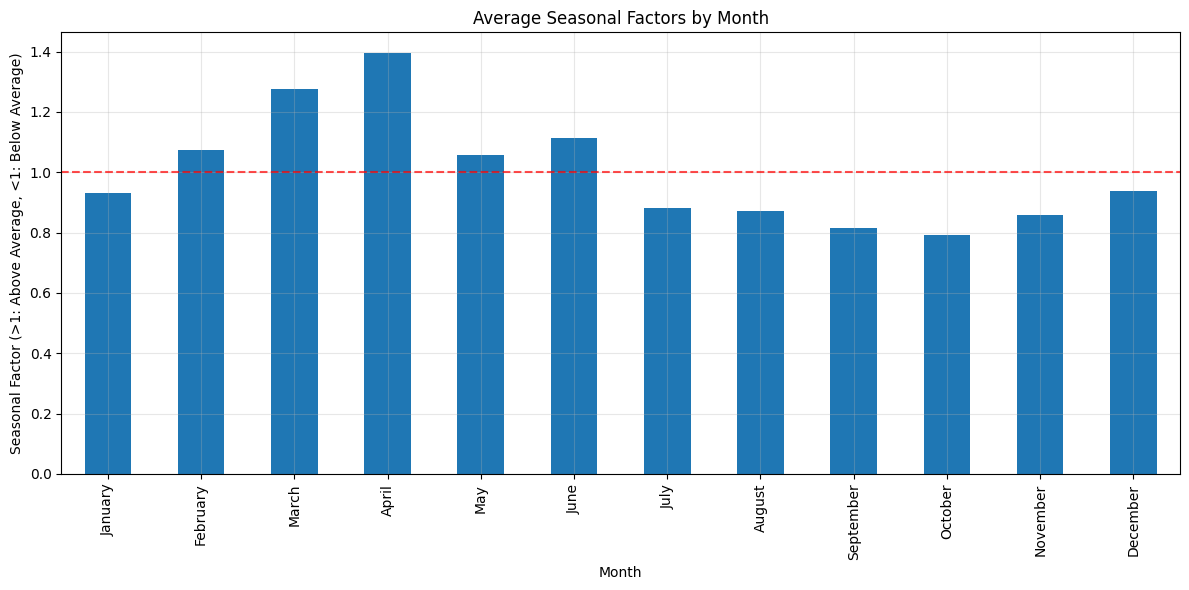

Deseasonalized data saved to 'deseasonalized_revenue.csv'


In [8]:
# For multiplicative model, divide the original data by the seasonal component
deseasonalized = revenue_series / decomposition.seasonal

# Plot the original vs deseasonalized data
plt.figure(figsize=(12, 6))
plt.plot(revenue_series, label='Original Revenue', alpha=0.7)
plt.plot(deseasonalized, label='Deseasonalized Revenue', linewidth=2)
plt.title('Original vs Deseasonalized Revenue')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Create a DataFrame to compare original and deseasonalized values
deseasonalized_df = pd.DataFrame({
    'Original': revenue_series,
    'Deseasonalized': deseasonalized,
    'Seasonal_Factor': decomposition.seasonal
})

# Display the first few rows
print("Comparison of Original and Deseasonalized Revenue:")
print(deseasonalized_df.head(12))

# Calculate year-over-year growth rates for deseasonalized data
# This shows the true growth trend without seasonal effects
deseasonalized_annual_growth = deseasonalized.pct_change(12) * 100

# Plot the year-over-year growth rates
plt.figure(figsize=(12, 6))
plt.plot(deseasonalized_annual_growth, label='Deseasonalized YoY Growth (%)')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Year-over-Year Growth Rate (Deseasonalized)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate and display summary statistics
print("\nDeseasonalized Revenue Statistics:")
print(deseasonalized.describe())

# Calculate the average seasonal factors by month
# This shows which months typically have higher/lower revenue
monthly_seasonal_factors = pd.DataFrame({
    'Seasonal_Factor': decomposition.seasonal
})
monthly_seasonal_factors['Month'] = monthly_seasonal_factors.index.month_name()
average_seasonal_factors = monthly_seasonal_factors.groupby('Month')['Seasonal_Factor'].mean().reindex(month_order)

# Plot the average seasonal factors
plt.figure(figsize=(12, 6))
average_seasonal_factors.plot(kind='bar')
plt.axhline(y=1, color='r', linestyle='--', alpha=0.7)
plt.title('Average Seasonal Factors by Month')
plt.ylabel('Seasonal Factor (>1: Above Average, <1: Below Average)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Export the deseasonalized data
deseasonalized_df.to_csv('deseasonalized_revenue.csv')
print("Deseasonalized data saved to 'deseasonalized_revenue.csv'")

In [9]:
print(decomposition.seasonal) #Avg Seasonal Indices

Date
2021-01-31    0.930892
2021-02-28    1.073026
2021-03-31    1.275639
2021-04-30    1.393933
2021-05-31    1.057653
2021-06-30    1.113841
2021-07-31    0.882040
2021-08-31    0.873005
2021-09-30    0.814592
2021-10-31    0.790587
2021-11-30    0.856948
2021-12-31    0.937844
2022-01-31    0.930892
2022-02-28    1.073026
2022-03-31    1.275639
2022-04-30    1.393933
2022-05-31    1.057653
2022-06-30    1.113841
2022-07-31    0.882040
2022-08-31    0.873005
2022-09-30    0.814592
2022-10-31    0.790587
2022-11-30    0.856948
2022-12-31    0.937844
2023-01-31    0.930892
2023-02-28    1.073026
2023-03-31    1.275639
2023-04-30    1.393933
2023-05-31    1.057653
2023-06-30    1.113841
2023-07-31    0.882040
2023-08-31    0.873005
2023-09-30    0.814592
2023-10-31    0.790587
2023-11-30    0.856948
2023-12-31    0.937844
Name: seasonal, dtype: float64


In [10]:
print(decomposition)